In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px grey solid !important;
  color: white !important;
}
</style>

In [4]:
import os
import re
import emoji
import demoji
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# processing of text
from preprocessing import Preprocessing
import text_for_plot_functions as text_f

#plot
from plot_functions import plot_word_cloud, count_plot_words


... OK (Got response in 0.55 seconds)
Writing emoji data to C:\Users\kotul\.demoji\codes.json ...
... OK


In [6]:
# setting display
pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = 300
pd.set_option("display.colheader_justify","left")
%matplotlib inline

# load and download
demoji.download_codes()

... OK (Got response in 0.49 seconds)
Writing emoji data to C:\Users\kotul\.demoji\codes.json ...
... OK


In [18]:
data = Preprocessing()
data.load_data()
data.conected_data.head(20)

,Comment,Kind of offensive language
0,"Dla mnie faworytem do tytułu będzie Cracovia. Zobaczymy, czy typ się sprawdzi.",0
1,@anonymized_account @anonymized_account Brawo ty Daria kibic ma być na dobre i złe,0
2,"@anonymized_account @anonymized_account Super, polski premier składa kwiaty na grobach kolaborantów. Ale doczekaliśmy czasów.",0
3,@anonymized_account @anonymized_account Musi. Innej drogi nie mamy.,0
4,"Odrzut natychmiastowy, kwaśna mina, mam problem",0
5,"Jaki on był fajny xdd pamiętam, że spóźniłam się na jego pierwsze zajęcia i to sporo i za karę kazał mi usiąść w pierwszej ławce XD",0
6,@anonymized_account No nie ma u nas szczęścia 😉,0
7,@anonymized_account Dawno kogoś tak wrednego nie widziałam xd,0
8,"@anonymized_account @anonymized_account Zaległości były, ale ważne czy były wezwania do zapłaty z których się klub nie wywiązał.",0
9,@anonymized_account @anonymized_account @anonymized_account Gdzie jest @anonymized_account . Brudziński jesteś kłamcą i marnym kutasem @anonymized_account,1


In [9]:
data.conected_data['Kind of offensive language'].value_counts().to_frame()\
    .rename_axis('Response', axis=1).style.set_properties(
        **{'color': 'white !important',
           'border': '1px grey solid !important',
           'text-align': 'center'}
        ).set_table_styles([{
            'selector': 'th',
            'props': [('border', '1px grey solid !important')]
        }])

Response,Kind of offensive language
0,10056
1,3255
2,78


In [20]:
data.remove_quoting_comments()
conected_data = pd.concat([data.x_raw, data.y], axis=1)

In [21]:
# prepare to function to extract emoji to dict
emoji_for_response_0 = []
emoji_for_response_1 = []
emoji_for_response_2 = []

In [22]:
conected_data['Emoticons'], conected_data['Number of emoticons in comment'] = \
    zip(*conected_data[['Comment', 'Kind of offensive language']].apply(\
                                       text_f.extract_emoticons, axis=1,
                                       args=(emoji_for_response_0,
                                            emoji_for_response_1,
                                            emoji_for_response_2)))

In [23]:
dict_count_emoji_0 = dict((i, emoji_for_response_0.count(i)) for i in
                          emoji_for_response_0)
dict_count_emoji_1 = dict((i, emoji_for_response_1.count(i)) for i in
                          emoji_for_response_1)
dict_count_emoji_2 = dict((i, emoji_for_response_2.count(i)) for i in
                          emoji_for_response_2)

In [24]:
conected_data[(conected_data['Kind of offensive language'] == 2) 
              & (conected_data['Number of emoticons in comment']>0)]

,Comment,Kind of offensive language,Emoticons,Number of emoticons in comment
1472,"@anonymized_account @anonymized_account Jaka tv, tacy idole😁😁😁 A tak trochę poważniej, to za tę napaść na dziewczynkę to tylko w ten pedalski ryj.",2,😁,3
1949,"@anonymized_account Zamknij niemiecki ryj,siedź w tej Brukseli i nie wracaj złodzieju!😬😬😬",2,😬,3


In [25]:
plot_emoticons = text_f.create_dataframe_emoji_comparison(dict_count_emoji_0,
                                                   dict_count_emoji_1,
                                                   dict_count_emoji_2,
                                                   ['Response_0', 'Response_1'])
plot_emoticons

,Response_0,Response_1,Response_2
emoji,,,
😁,850.0,67.0,3.0
:),743.0,42.0,NaN
😂,626.0,33.0,NaN
xd,199.0,6.0,NaN
😀,167.0,9.0,NaN
😉,161.0,NaN,NaN
;-),127.0,1.0,NaN
:d,93.0,3.0,NaN
;),88.0,10.0,NaN


In [23]:
conected_data['Comment'] = conected_data['Comment'].apply(lambda x: emoji.demojize(x))
# conected_data['Comment'] = text_f.preprocess_text(conected_data['Comment'])

In [24]:
def preprocess_text(data: pd.Series, stopwords_remove=False):
    # remove of @name
    pattern = re.compile(r'@\w+[\s]*')
    data = data.str.replace(pattern, '')

    # remove of links https
    pattern = re.compile(r"https?[:\/\/]+[a-zA-Z0-9.\-\/?=_~:#%]+")
    data = data.str.replace(pattern, '')

    # removal of punctuations and numbers
    pattern = re.compile(r'[^_ąćęłńóśźżĄĆĘŁŃÓŚŹŻa-zA-Z\s]')
    data = data.str.replace(pattern, '')

    # remove more than one space
    pattern = re.compile(r'\s+')
    data = data.str.replace(pattern, ' ')

    # remove beginning and ending task space
    pattern = re.compile(r'^\s+|\s+?$')
    data = data.str.replace(pattern, '')

    # removal of capitalization
    data = data.str.lower()

    # tokenizing
    if stopwords_remove:
        data = data.apply(lambda x: x.split())
        data = data.apply(
            lambda x: [item for item in x if item not in stopwords])
        for i in range(len(data)):
            data[i] = ' '.join(data[i])
    return data

In [25]:
conected_data['Comment'] = preprocess_text(conected_data['Comment'], stopwords_remove=True)

In [26]:
conected_data

,Comment,Kind of offensive language,Emoticons,Number of emoticons in comment
0,faworytem tytułu cracovia zobaczymy typ sprawdzi,0,,0
1,brawo daria kibic dobre złe,0,,0
2,super polski premier składa kwiaty grobach kolaborantów doczekaliśmy czasów,0,,0
3,innej drogi mamy,0,,0
4,odrzut natychmiastowy kwaśna mina problem,0,,0
...,...,...,...,...
12675,problemu prześwitującą bluzką prostu kiepsko wyglądamało zgrabnie,1,,0
12676,piękna twarz oszpecona wyskubanymi włosami lustra ujęła kobiecości,1,,0
12677,szkoda miała stanik nadziej przyszłym programie miała,1,,0
12678,źle dobrany biustonosz spódniczka trochę wąska wystarczy celebrytko obejrzeć lustrze zobaczyć czym piszę,1,,0


In [29]:
conected_data = conected_data[['Comment', 'Kind of offensive language']]
conected_data.to_csv('data_for_model.csv', index=False)

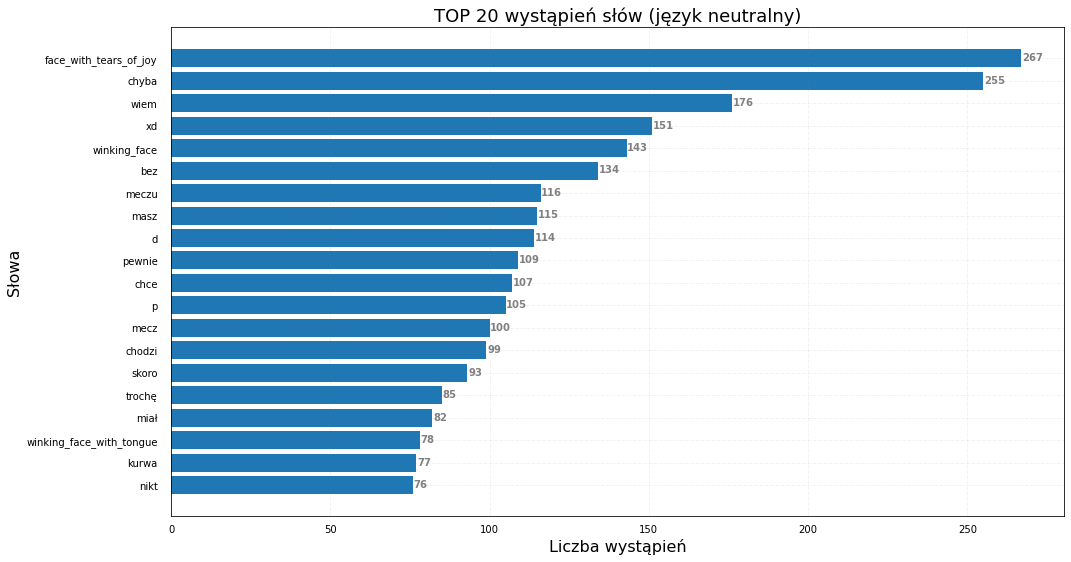

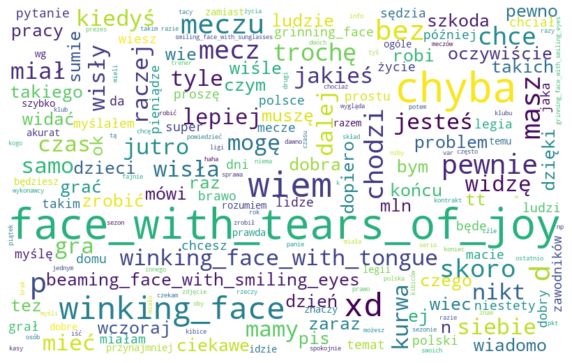

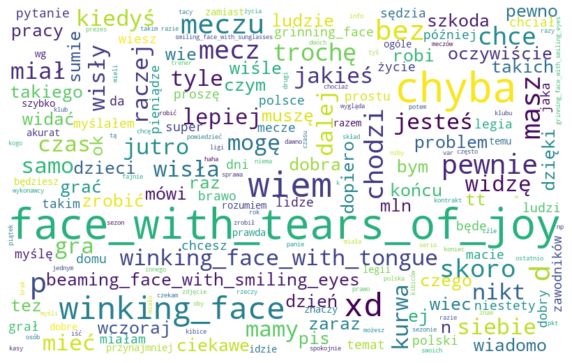

In [30]:
# visualizing which of the word is most commonly used
kind_0 = conected_data[conected_data['Kind of offensive language']==0]
count_plot_words(kind_0, 'język neutralny')
plot_word_cloud(kind_0)
plot_word_cloud(kind_0, stopwords=stopwords)

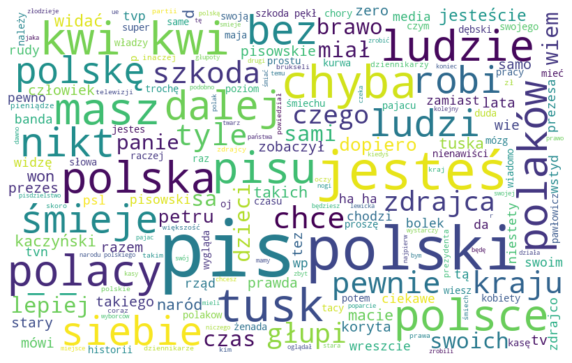

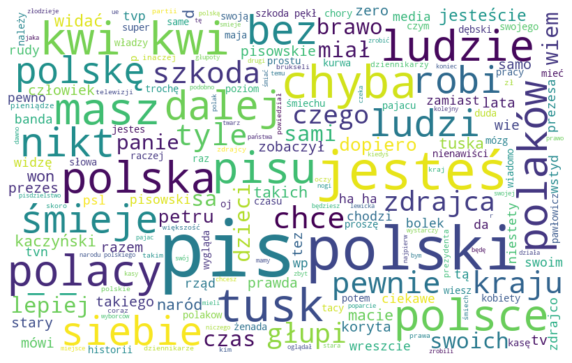

In [31]:
# visualizing which of the word is most commonly used
kind_1 = conected_data[conected_data['Kind of offensive language']==1]
plot_word_cloud(kind_1)
plot_word_cloud(kind_1, stopwords=stopwords)

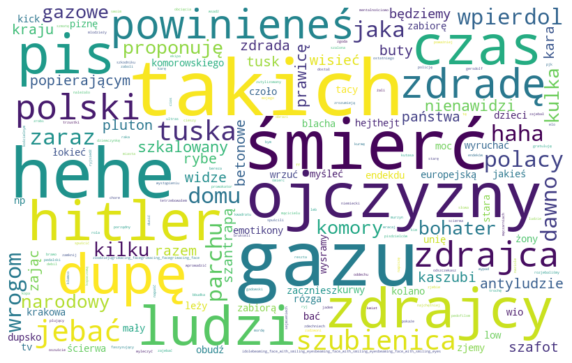

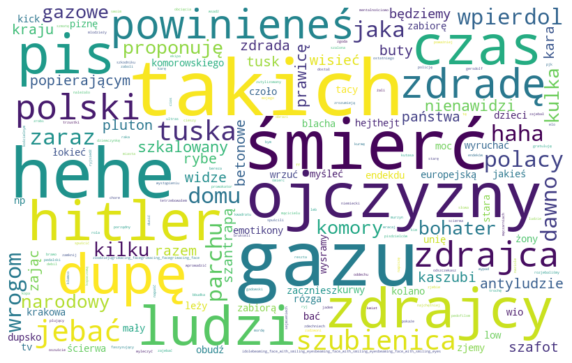

In [32]:
# visualizing which of the word is most commonly used
kind_2 = conected_data[conected_data['Kind of offensive language']==2]
plot_word_cloud(kind_2)
plot_word_cloud(kind_2, stopwords=stopwords)

# Model

In [33]:
data = train_validation_test_split(conected_data, random_state=101)

In [34]:
data

,Comment,Kind of offensive language,split
0,nazwisku wiezienia,1,train
1,normalne sępy,0,train
2,kobiety dawajcie same gwałcić,1,train
3,zagraniczne doinformowane chodzi polskie zawodniczki pewno znajdą kasa ważna,0,train
4,zgadzam prosta różnica popatrz lustro zobaczysz dupka,1,train
...,...,...,...
12675,lahoza szkoda wolę pierwszym planie piłkarze sędzia,0,test
12676,grozi tez katolizacja panstwo popierac religijnych kitów mitów,1,test
12677,polacy ratujmy polskę zlodzieji lisa woljsdojcza,0,test
12678,podane źródło wypowiedź zmanipulowana normalnie pisowsku,0,test


In [39]:
percent = data.groupby(['Kind of offensive language', 'split']).count()
percent.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Comment  
Kind of offensive language split           
0                          test   19.993653
                           train  60.002116
                           val    20.004231
1                          test   20.025389
                           train  59.980958
                           val    19.993653
2                          test   19.736842
                           train  60.526316
                           val    19.736842